# Make splits for task 2 (reaction extrapolation i.e. enzyme retrieval)

For reaction extrapolation, we want to test for how well each method can predict the reactions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
reaction2EC = pd.read_csv('../processed_data/reaction2EC.csv')

reaction2EC['EC3'] = reaction2EC['EC number'].str.split('.').str[:3].str.join('.')
reaction2EC['EC2'] = reaction2EC['EC number'].str.split('.').str[:2].str.join('.')
reaction2EC['EC1'] = reaction2EC['EC number'].str.split('.').str[:1].str.join('.')
reaction2EC['Duplicated EC'] = reaction2EC['EC number'].duplicated(keep=False)
reaction2EC['members EC'] = reaction2EC['EC number'].map(reaction2EC['EC number'].value_counts())
# reaction2EC ### Maybe include the ones that map to multiple ECs?
reaction2EC

,Reaction,Mapped Reaction,EC number,Reaction Text,EC3,EC2,EC1,Duplicated EC,members EC
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r},1.1.1,1.1,1,True,649
1,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,1.1.1,1.1,1,True,649
2,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,1.1.1,1.1,1,True,649
3,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,1.1.1,1.1,1,True,649
4,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,1.1.1,1.1,1,True,649
...,...,...,...,...,...,...,...,...,...
61761,CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...,NaN,7.6.2.8,NaN,7.6.2,7.6,7,True,3
61762,CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@H]([C@H]...,NaN,7.6.2.8,NaN,7.6.2,7.6,7,True,3
61763,C[N+]1(C)CCC[C@H]1C(=O)[O-].Nc1ncnc2c1ncn2[C@@...,NaN,7.6.2.9,NaN,7.6.2,7.6,7,True,3
61764,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,NaN,7.6.2.9,NaN,7.6.2,7.6,7,True,3


(array([5.8679e+04, 1.8920e+03, 7.4300e+02, 2.0700e+02, 9.0000e+01,
        3.8000e+01, 0.0000e+00, 5.1000e+01, 0.0000e+00, 6.6000e+01]),
 array([ 1. ,  7.5, 14. , 20.5, 27. , 33.5, 40. , 46.5, 53. , 59.5, 66. ]),
 <BarContainer object of 10 artists>)

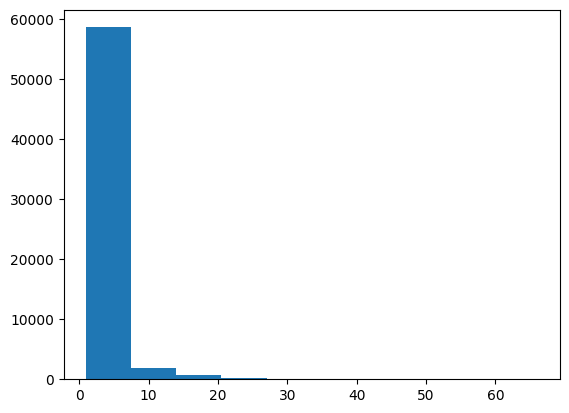

In [3]:
from collections import defaultdict
reaction_to_ec = defaultdict(list)
for reaction, ec in reaction2EC[['Reaction', 'EC number']].values:
    reaction_to_ec[reaction].append(ec)
reaction2EC['Reactions with a single EC'] = [len(reaction_to_ec.get(r)) for r in reaction2EC['Reaction'].values]
plt.hist(reaction2EC['Reactions with a single EC'])

In [4]:
#only keeps ECs with multiple example reactions
mapped = reaction2EC.dropna(subset='Mapped Reaction')
mapped = mapped[mapped['Reactions with a single EC'] == 1]
 #remove rows with no mapped reaction for test set building
#unique_reactions_multiple_ec = mapped[mapped['Duplicated EC'] == True] 
#only keep ECs with at least three reactions
unique_reactions_multiple_ec = mapped[mapped['members EC'] > 3] 
unique_reactions_multiple_ec

,Reaction,Mapped Reaction,EC number,Reaction Text,EC3,EC2,EC1,Duplicated EC,members EC,Reactions with a single EC
1,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,1.1.1,1.1,1,True,649,1
2,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,1.1.1,1.1,1,True,649,1
3,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,1.1.1,1.1,1,True,649,1
4,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,1.1.1,1.1,1,True,649,1
8,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,N-benzyl-4-piperidone + NADH + H+ = N-benzylpi...,1.1.1,1.1,1,True,649,1
...,...,...,...,...,...,...,...,...,...,...
61568,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.1,"ATP + UTP = P1-(5'-adenosyl),P4-(5'-uridinyl)t...",6.5.1,6.5,6,True,22,1
61572,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.3,"ATPgammaS + ATP = P1,P4-bis(5'-adenosyl) tetra...",6.5.1,6.5,6,True,12,1
61580,Nc1ccn([C@@H]2O[C@H](COP(=O)(O)O[C@H]3[C@@H](O...,[NH2:1][c:2]1[cH:3][cH:4][n:5]([C@@H:6]2[O:7][...,6.5.1.3,"5'-adenylated cytidine 5',3'-bisphosphate + di...",6.5.1,6.5,6,True,12,1
61581,C=C(C)CCOP(=O)(O)OP(=O)(O)OP(=O)(O)O.Nc1ncnc2c...,[CH2:1]=[C:2]([CH3:3])[CH2:4][CH2:5][O:6][P:7]...,6.5.1.3,ATP + isopentenyl triphosphate = isopentenyl-t...,6.5.1,6.5,6,True,12,1


### The hard test set will have a different test set

Technically this doesn't require it to be an EC with a duplicated reaction class
Cannot use the same ECs as the first split, otherwise all of the data will be held out

In [5]:
EC_df = pd.DataFrame({'EC number': unique_reactions_multiple_ec['EC number'].unique()})
EC_df['EC3'] = EC_df['EC number'].str.split('.').str[:3].str.join('.')
EC_df['EC2'] = EC_df['EC number'].str.split('.').str[:2].str.join('.')
EC_df['EC1'] = EC_df['EC number'].str.split('.').str[:1].str.join('.')

EC_df

,EC number,EC3,EC2,EC1
0,1.1.1.1,1.1.1,1.1,1
1,1.1.1.10,1.1.1,1.1,1
2,1.1.1.100,1.1.1,1.1,1
3,1.1.1.101,1.1.1,1.1,1
4,1.1.1.102,1.1.1,1.1,1
...,...,...,...,...
2101,6.3.5.4,6.3.5,6.3,6
2102,6.4.1.3,6.4.1,6.4,6
2103,6.4.1.4,6.4.1,6.4,6
2104,6.5.1.1,6.5.1,6.5,6


In [6]:
np.random.seed(42)
random.seed(42)
EC_grouped_df = EC_df.groupby('EC3').sample(1)[['EC3' , 'EC2', 'EC1']]
EC_grouped_df

,EC3,EC2,EC1
140,1.1.1,1.1,1
197,1.1.2,1.1,1
209,1.1.3,1.1,1
215,1.1.5,1.1,1
224,1.1.9,1.1,1
...,...,...,...
2096,6.3.3,6.3,6
2099,6.3.4,6.3,6
2101,6.3.5,6.3,6
2103,6.4.1,6.4,6


## Hard set generation

 For the hard set, reactions are held out unfiormly over level 2, but sampled from level 3, and then there is a random sample from this set.

## Filter for "hard reactions"

In [7]:
np.random.seed(42)
random.seed(42)

# Make sure they are evenly distributed over different EC2's
EC2_selected = EC_grouped_df.groupby('EC2').sample(1)
EC3s_hard = EC2_selected['EC3'].values
EC3s_hard #these are the ones to hold out at level 3

np.random.seed(42)
random.seed(42)

EC_df_selected = EC_df[EC_df['EC3'].isin(EC3s_hard)]
ECs = EC_df_selected.sample(frac=1).groupby("EC3").head(5)['EC number'].values #sample up to 5 if availalbe most ECs don't have that many examples at level 4
len(ECs)
hard_reactions = unique_reactions_multiple_ec[unique_reactions_multiple_ec['EC number'].isin(ECs)]
print(len(hard_reactions))
#hard_test = hard_reactions.groupby('EC number').sample(1) # Select a single sample for testing (and then the rest will be training)
hard_test = hard_reactions.groupby('EC number').sample(3, replace=True)
#drop duplicate reactions
hard_test = hard_test.drop_duplicates(subset='Reaction')

hard_test

2797


,Reaction,Mapped Reaction,EC number,Reaction Text,EC3,EC2,EC1,Duplicated EC,members EC,Reactions with a single EC
1219,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.14,meso-erythritol + NAD+ = erythrulose + NADH,1.1.1,1.1,1,True,38,1
1248,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.14,4-deoxy-D-sorbitol + NAD+ = 4-deoxy-D-fructose...,1.1.1,1.1,1,True,38,1
1245,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.14,3-fluoro-D-sorbitol + NAD+ = 3-fluoro-D-fructo...,1.1.1,1.1,1,True,38,1
1810,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.179,"D-arabinose + NADP+ = D-arabinono-1,5-lactone ...",1.1.1,1.1,1,True,13,1
1811,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.179,"D-arabinose + NADP+ = D-arabinono-1,5-lactone ...",1.1.1,1.1,1,True,13,1
...,...,...,...,...,...,...,...,...,...,...
61539,CC(C)=CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)CO...,[CH3:1][C:2]([CH3:3])=[CH:4][C:5](=[O:6])[S:7]...,6.4.1.4,UTP + 3-methylcrotonoyl-CoA + HCO3- = UDP + ph...,6.4.1,6.4,6,True,8,1
61559,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.1,ATP + clodronate = adenosine 5'-triphosphate d...,6.5.1,6.5,6,True,22,1
61555,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.1,"ATP + XDP = P1-(5'-adenosyl),P4-(5'-xanthosyl)...",6.5.1,6.5,6,True,22,1
61582,N=c1[nH]c(=O)c2ncn([C@@H]3O[C@H](COP(=O)(O)OP(...,[NH2:56][c:57]1[cH:58][cH:59][n:60]([C@@H:61]2...,6.5.1.3,"5'-adenylated cytidine 5',3'-bisphosphate + di...",6.5.1,6.5,6,True,12,1


In [8]:
hard_test['EC3'].nunique()

53

### The easy and medium test splits will share the same test set

Correlate it so that the reactions used in the hard test set are also used in the easy and medium when possible
But the holdout sequences will be different

In [9]:
np.random.seed(42)
random.seed(42)
#remove the EC3s that were selected for the hard test
EC_df_nothard = EC_df[~EC_df['EC3'].isin(EC3s_hard)]

#sample a random one from each EC
EC_df_selected = EC_df_nothard.groupby('EC3').sample(1)
ECs = EC_df_selected['EC number'].values

filtered = unique_reactions_multiple_ec[unique_reactions_multiple_ec['EC number'].isin(ECs)]
np.random.seed(42)
random.seed(42)
#easy_medium_test1 = filtered.groupby('EC number').sample(1)
easy_medium_test1 = filtered.groupby('EC number').sample(3, replace=True)
easy_medium_test1 = easy_medium_test1.drop_duplicates(subset='Reaction')

#take the EC3s from the hard test append them to the easy/medium test
hard_test['EC3'] = hard_test['EC number'].str.split('.').str[:3].str.join('.')
np.random.seed(42)
random.seed(42)
#easy_medium_test2 = hard_test.groupby('EC3').sample(1)
easy_medium_test2 = hard_test.groupby('EC3').sample(3, replace=True)
easy_medium_test2 = easy_medium_test2.drop_duplicates(subset='Reaction')
easy_medium_test2

easy_medium_test = pd.concat([easy_medium_test1, easy_medium_test2]).sort_values('EC number')
easy_medium_test = easy_medium_test.drop_duplicates(subset='Reaction')

easy_medium_test

,Reaction,Mapped Reaction,EC number,Reaction Text,EC3,EC2,EC1,Duplicated EC,members EC,Reactions with a single EC
1810,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.179,"D-arabinose + NADP+ = D-arabinono-1,5-lactone ...",1.1.1,1.1,1,True,13,1
2351,CCCCC[C@H](O)/C=C/[C@@H]1[C@@H](C/C=C\CCCC(=O)...,[CH3:1][CH2:2][CH2:3][CH2:4][CH2:5][C@H:6]([OH...,1.1.1.189,prostaglandin E2 + NAD(P)H = prostaglandin F2a...,1.1.1,1.1,1,True,18,1
4616,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.309,phosphonoacetaldehyde + NADPH + H+ = 2-hydroxy...,1.1.1,1.1,1,True,4,1
7337,CCCCCCCCO.O=C1C=CC(=Nc2cc(Cl)c(O)c(Cl)c2)C=C1>...,[CH3:1][CH2:2][CH2:3][CH2:4][CH2:5][CH2:6][CH2...,1.1.2.7,"octanol + 2,6-dichlorophenolindophenol = octal...",1.1.2,1.1,1,True,9,1
7406,O=O.OC[C@@H]1O[C@@H](O)[C@@H](O)[C@H](O)[C@H]1...,[O:1]=[O:2].[OH:3][CH2:4][C@@H:5]1[O:6][C@@H:7...,1.1.3.10,maltose + O2 = 2-dehydro-D-maltose + H2O2,1.1.3,1.1,1,True,95,1
...,...,...,...,...,...,...,...,...,...,...
61532,CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)...,[CH3:1][CH2:2][C:3](=[O:4])[S:5][CH2:6][CH2:7]...,6.4.1.3,GTP + propanoyl-CoA + HCO3- = GDP + phosphate ...,6.4.1,6.4,6,True,7,1
61531,CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)...,[CH3:1][CH2:2][C:3](=[O:4])[S:5][CH2:6][CH2:7]...,6.4.1.3,propionyl-CoA + CO2 = (2S)-methylmalonyl-CoA,6.4.1,6.4,6,True,7,1
61555,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.1,"ATP + XDP = P1-(5'-adenosyl),P4-(5'-xanthosyl)...",6.5.1,6.5,6,True,22,1
61559,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.1,ATP + clodronate = adenosine 5'-triphosphate d...,6.5.1,6.5,6,True,22,1


In [10]:
#check to make sure some of them are in the hard set
#show only ten rows
len(easy_medium_test[easy_medium_test['Reaction'].isin(hard_test['Reaction'])])

130

## Now save the test splits

In [11]:
reaction2EC_easy_train = reaction2EC[~reaction2EC['Reaction'].isin(easy_medium_test['Reaction'])]
reaction2EC_medium_train = reaction2EC[~reaction2EC['EC number'].isin(easy_medium_test['EC number'])]
reaction2EC_hard_train = reaction2EC[~reaction2EC['EC3'].isin(hard_test['EC3'])]

easy_medium_test.to_csv('../splits/task2/easy_reaction_test.csv', index=False)
easy_medium_test.to_csv('../splits/task2/medium_reaction_test.csv', index=False)
hard_test.to_csv('../splits/task2/hard_reaction_test.csv', index=False)

reaction2EC_easy_train.to_csv('../splits/task2/easy_reaction_train.csv', index=False)
reaction2EC_medium_train.to_csv('../splits/task2/medium_reaction_train.csv', index=False)
reaction2EC_hard_train.to_csv('../splits/task2/hard_reaction_train.csv', index=False)

for set in [easy_medium_test, easy_medium_test, hard_test,reaction2EC_easy_train, reaction2EC_medium_train, reaction2EC_hard_train]:
    print(len(set))

393
393
460
61373
57691
35252


In [14]:
reaction2EC_easy_train['EC number'].nunique(), reaction2EC_medium_train['EC number'].nunique(), reaction2EC_hard_train['EC number'].nunique()

(4960, 4748, 3052)

### For random initial testing (remove later)

In [17]:
import pandas as pd
processed = pd.read_csv('../processed_data/protein2EC.csv')
aggregated = processed.groupby('Sequence').agg({'EC number': lambda x: list(x)}).reset_index()
#map back to the Entry as well
aggregated['Entry'] = aggregated['Sequence'].map(processed.drop_duplicates('Sequence').set_index('Sequence')['Entry'])
aggregated['EC number'] = aggregated['EC number'].apply(lambda x: ';'.join(x))
aggregated = aggregated[['Entry', 'EC number', 'Sequence']]
aggregated.to_csv('../processed_data/protein2EC_train.csv', index=False, sep='\t')

In [ ]:
price = pd.read_csv('../splits/task1/price_protein_test.csv')
price.to_csv('../splits/task1/price_protein_test.csv', index=False, sep='\t')